In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.graph import *
from src._constants import *

In [3]:
def draw_graph_schema(graph):
    display(
        Image(
            graph.get_graph().draw_mermaid_png(
                draw_method=MermaidDrawMethod.API,
            )
        )
    )

In [4]:
def state_output_format(workflow, graph, config):
    states = list(graph.get_state_history(config))
    with open(f"results/{workflow.name}_history.txt", "w") as f:
        for state in states:
            print("*********************************************************************", file=f)
            print(state.next, file=f) 
            print("====Retrieved Evidence======", file=f)
            print(state.values['retrieved_evidence'], file=f)
            print("====User Proposal======",file=f)
            print(state.values['user_proposal'], file=f)
            print("====Risk Assessment and Rating======", file=f)
            print(state.values['risk_assessment_and_rating'], file=f)
            print("====Proposal Feedback======", file=f)
            print(state.values['proposal_feedback'], file=f)
            print("====Improved Proposal======", file=f)
            print(state.values['improved_proposal'],file=f)
            print("====Pass or Fail======", file=f)
            print(state.values['pass_or_fail'], file=f)

In [5]:
memory = MemorySaver()

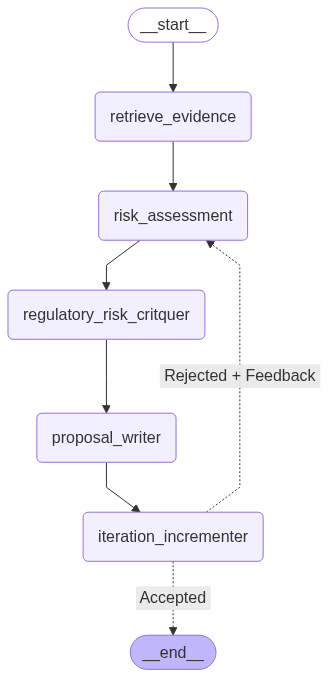

In [6]:
# Compile
w = Workflow(name = "workflow_v2.2", strategy="langflow_unique")
graph = w.build_graph(memory)
draw_graph_schema(graph)

In [12]:
config = {"configurable": {"thread_id": "2"}}

state = graph.invoke({"user_proposal": USER_PROMPT, "iteration_count": 0}, config)

0
8 -1
1
7 -1


In [13]:
for s in graph.get_state_history(config):
    print(s)

StateSnapshot(values={'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'retrieved_evidence': ['Lebrikizumab failed Phase 3 for asthma (NCT02918071) due to weak correlation of AER with symptom control.', 'Dupilumab succeeded in similar eosinophilic population with endpoint of FEV1 + biomarker stratification (BLA761469).'], 'risk_assessment_and_rating': 'Respilimab proposal lacks clarity in several critical areas. Specifically, mechanistic risk is high due to prior IL-13 failure data, and biomarker assessment is also concerning. Safety monitoring could be improved with more detailed post-marketing reports. Furthermore, regulatory 

In [14]:
state

{'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.',
 'retrieved_evidence': ['Lebrikizumab failed Phase 3 for asthma (NCT02918071) due to weak correlation of AER with symptom control.',
  'Dupilumab succeeded in similar eosinophilic population with endpoint of FEV1 + biomarker stratification (BLA761469).'],
 'risk_assessment_and_rating': 'Respilimab proposal lacks clarity in several critical areas. Specifically, mechanistic risk is high due to prior IL-13 failure data, and biomarker assessment is also concerning. Safety monitoring could be improved with more detailed post-marketing reports. Furthermore, regulatory compliance risks 

In [15]:
w.print_chat(state)

ITERATION 2

 Original Proposal:
This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.

 Retrieved Evidence:
- Lebrikizumab failed Phase 3 for asthma (NCT02918071) due to weak correlation of AER with symptom control.
- Dupilumab succeeded in similar eosinophilic population with endpoint of FEV1 + biomarker stratification (BLA761469).

 Risk Assessment Summary:
Respilimab proposal lacks clarity in several critical areas. Specifically, mechanistic risk is high due to prior IL-13 failure data, and biomarker assessment is also concerning. Safety monitoring could be improved with more detailed post-marketing reports. Furthermore, regulatory compliance risks 

In [16]:
state_output_format(w, graph, config)

KeyError: 'improved_proposal'